# Pima Indians Diabetes Dataset: Exploratory Data Analysis

## Data Preprocessing / Feature Engineering


In this section, we will perform data preprocessing and feature engineering to prepare the dataset for modeling. This includes handling missing values, creating new features, and transforming existing variables to improve model performance.

Below are the essential library imports used throughout this notebook. These include tools for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), machine learning model development and evaluation (`scikit-learn`, `lightgbm`, `imblearn`), and advanced data preprocessing. Each import is chosen to support a specific step in the data analysis and modeling workflow.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))


In [2]:
from scripts.data_preprocessing import load_data,plot_boxplot,plot_correlation_matrix,plot_histograms,feature_engineering,imputer
import config

In [3]:
import numpy as np

In [4]:
df = load_data()
df.shape 

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


During our Exploratory Data Analysis (EDA), we've come across an interesting observation: several columns contain 0 values. While a 0 makes perfect sense for features like Pregnancies or Age, it's biologically impossible for a living person to have a BloodPressure, Glucose, SkinThickness, Insulin, or BMI of zero. This strongly suggests that these 0s are actually missing data that were recorded as zeros.

To quantify just how many of these suspicious zeros are present, we used the following code

In [8]:
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

As highlighted by the output, features like Insulin, SkinThickness, BloodPressure, BMI, and Glucose have a significant number of 0 values that require careful handling. These will be treated as missing values in the upcoming data preprocessing steps to ensure our models are built on accurate data.

In [9]:
columns_with_missing_data = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns_with_missing_data] = df[columns_with_missing_data].replace(0,np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

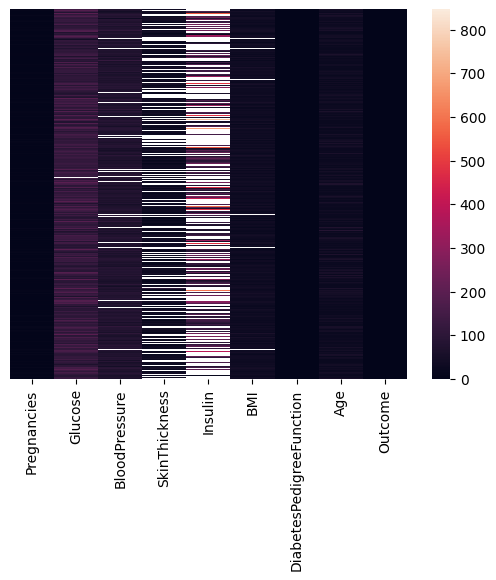

In [11]:
sns.heatmap(df,yticklabels=False)


 
To visually confirm and understand the distribution of these potentially missing values (represented as zeros), a heatmap was generated. This plot allows us to see the patterns of these zeros across different features and instances in our dataset.

The heatmap above was created by mapping the 0 values (which we are treating as missing) to a distinct color, typically white or a very light shade, while actual data points (non-zero values) are represented by darker shades.

Observations from the Heatmap:

- White Horizontal Lines: The prominent white horizontal lines, particularly noticeable in the SkinThickness and Insulin columns, clearly indicate rows where a significant number of 0s (missing values) are present.
- Insulin and SkinThickness Dominance: As suggested by our `df[df == 0].count()` output, Insulin and SkinThickness show the highest frequency of these white lines, confirming they have the largest proportion of missing values.
- Other Columns: BloodPressure, Glucose, and BMI also show some white lines, though less dense than Insulin and SkinThickness, consistent with their lower counts of zeros.
- Pregnancies: While Pregnancies also has white lines, here 0 is a valid value (representing no pregnancies), so these do not indicate missing data in the same way.
- DiabetesPedigreeFunction, Age, Outcome: These columns appear consistently dark, indicating no 0 values that would be considered missing data, which aligns with our previous count.
- Pattern of Missingness: The heatmap helps us visually assess if the missingness is random or if there's a pattern (e.g., specific rows missing multiple values, or missingness confined to certain features). In this case, it appears that the missingness in SkinThickness and Insulin is spread across many different records.

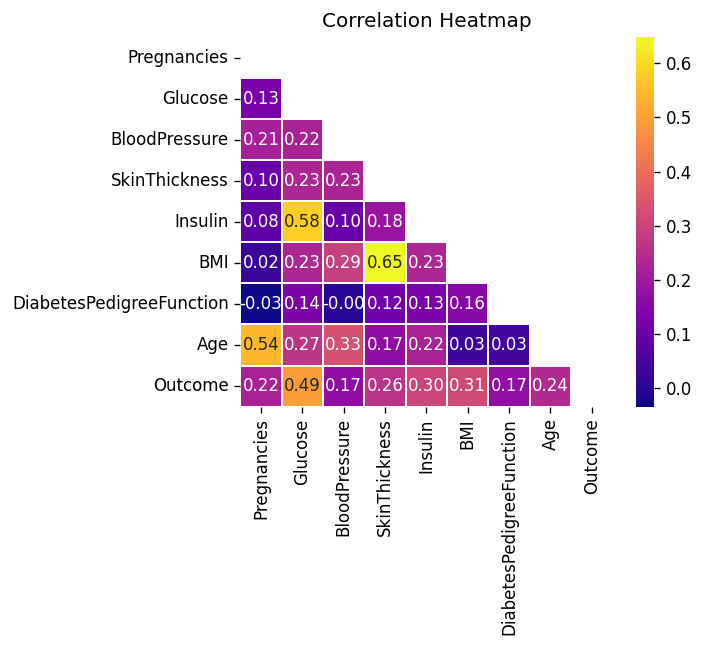

In [12]:
plot_correlation_matrix(df)

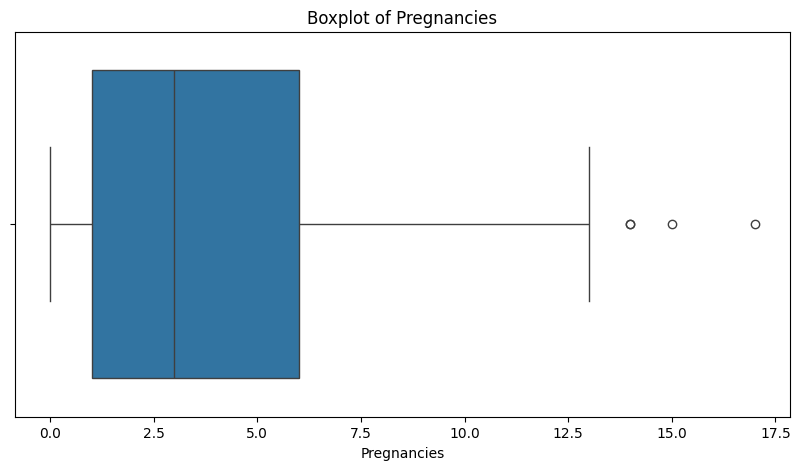

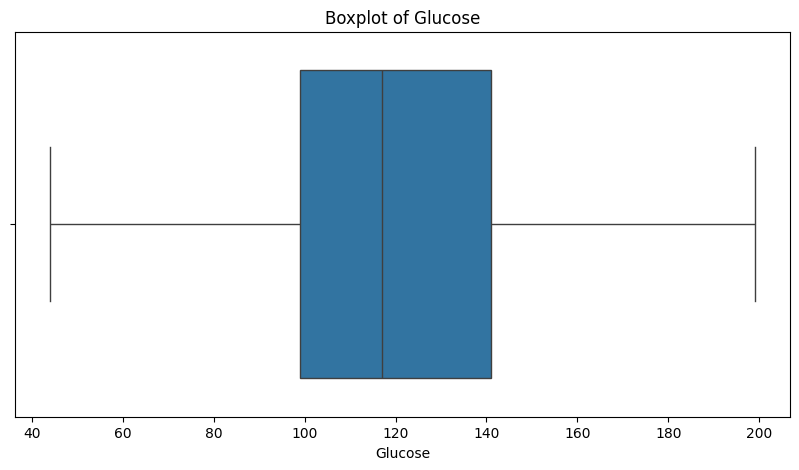

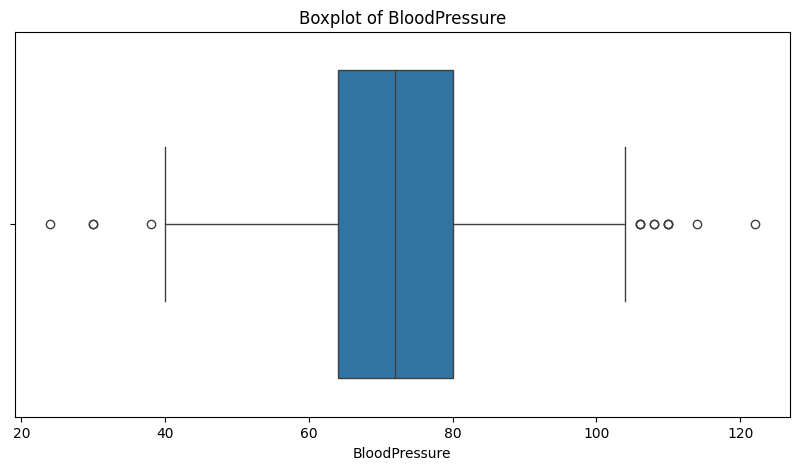

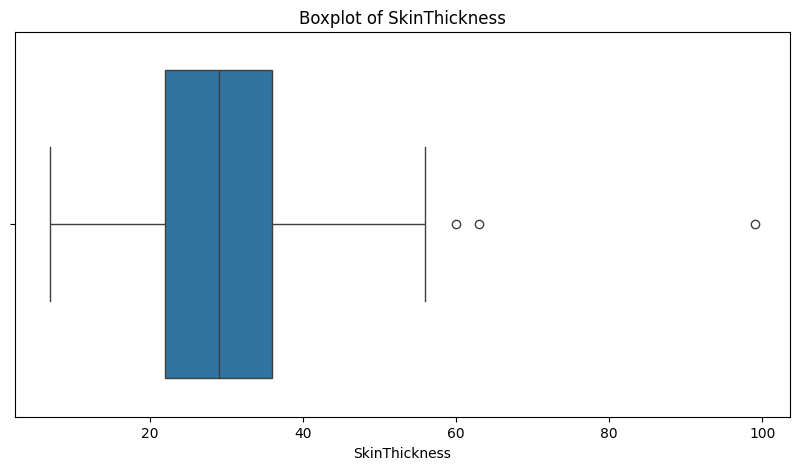

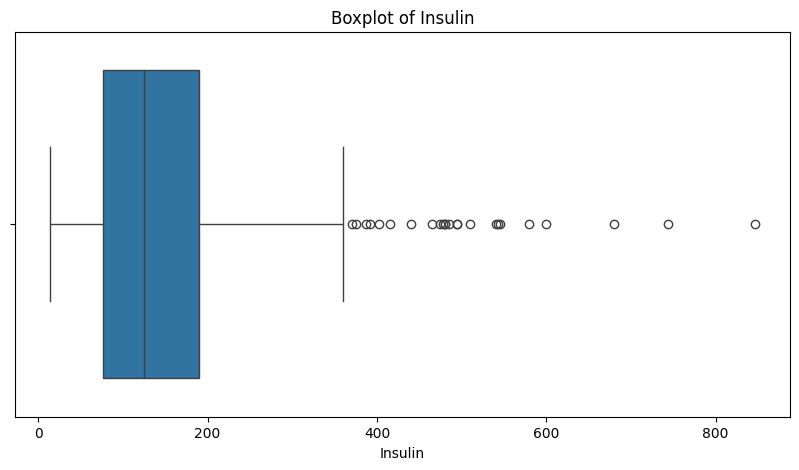

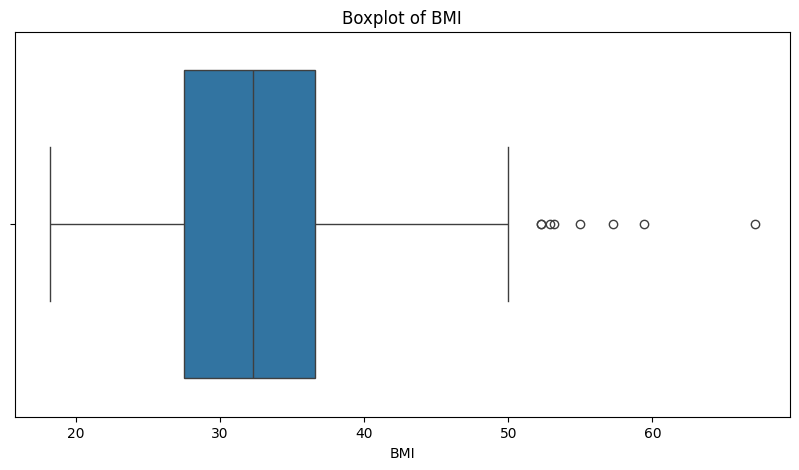

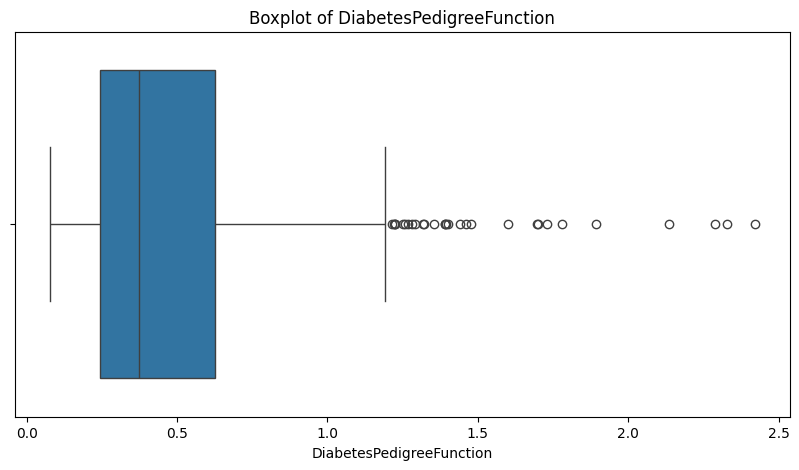

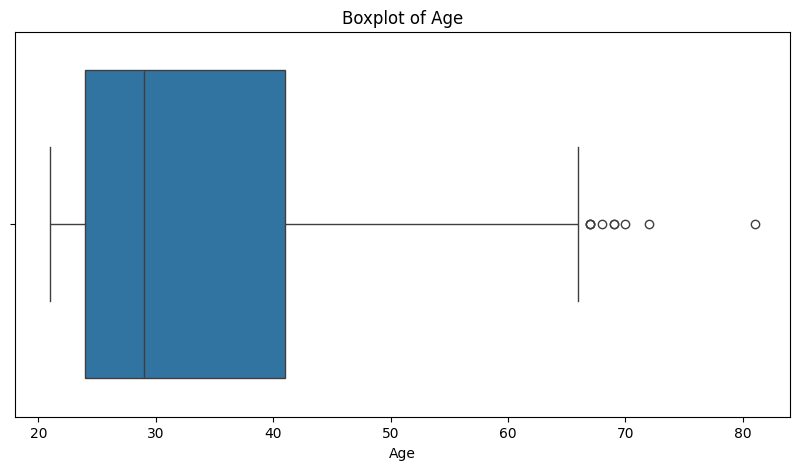

In [13]:
for col in df.columns:
    if col != 'Outcome':
        plot_boxplot(df,col)

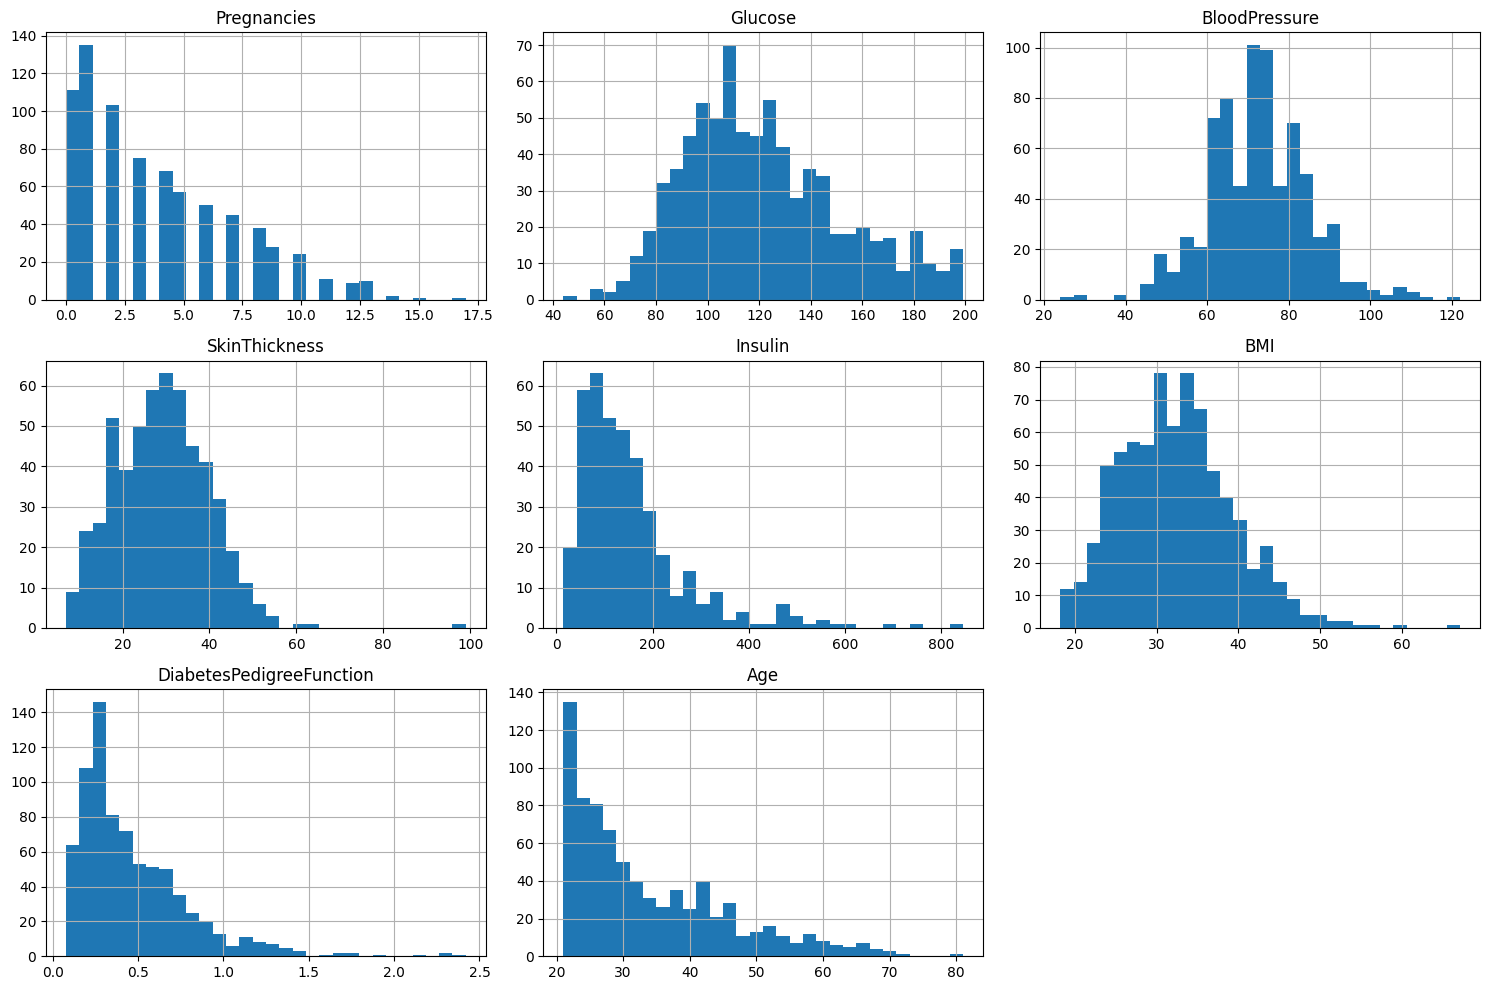

In [14]:
plot_histograms(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

Univariate Analysis: Distribution of Features (Histograms)

To understand the individual distribution of each numerical feature in our dataset, we generated a series of histograms. Each histogram provides a visual representation of the frequency distribution of values within that particular column.

The grid of histograms above displays the distribution for each of the independent variables in the Pima Indians Diabetes dataset:

- Pregnancies: The distribution shows that a large number of women in the dataset have had few pregnancies, with the frequency decreasing as the number of pregnancies increases. This is a right-skewed distribution.
- Glucose: The glucose levels appear to be roughly normally distributed but with a slight right skew, indicating a concentration of values around the mean and a tail extending towards higher glucose levels.
- BloodPressure: This histogram also appears somewhat normally distributed, centered around a typical blood pressure range. There might be some outliers or specific patterns at the lower and higher ends.
- SkinThickness: Similar to Insulin, this feature is heavily right-skewed, with a large concentration of values at the lower end, suggesting a substantial number of individuals with lower skinfold thickness measurements.
- Insulin: This feature exhibits a highly right-skewed distribution, with a significant spike at very low insulin levels (likely reflecting the imputed zero/missing values or actual low values), and a long tail extending to higher values. This skewness suggests a non-normal distribution, which might require transformation for some models.
- BMI (Body Mass Index): The BMI distribution appears to be relatively normal, with a peak around the common BMI ranges, but with a slight right skew indicating some individuals with higher BMIs.
- DiabetesPedigreeFunction: This feature is strongly right-skewed, with most values concentrated at the lower end. This function quantifies the genetic predisposition to diabetes based on family history.
- Age: The age distribution is also right-skewed, indicating that the majority of individuals in the dataset are younger adults, with fewer participants in older age groups.

Key Insights from Histograms:

- Distribution Shapes: The histograms clearly illustrate the shape of the data distribution for each feature, identifying whether they are normal, skewed (right or left), or multimodal.
- Presence of Outliers/Extremes: Long tails in the histograms (e.g., in Insulin, DiabetesPedigreeFunction, Age) can indicate the presence of outliers or extreme values that might need further investigation or treatment.
- Feature Skewness: Features like Pregnancies, Insulin, SkinThickness, DiabetesPedigreeFunction, and Age are notably right-skewed. This skewness can sometimes negatively impact the performance of certain machine learning models that assume normally distributed input features.
- Data Range and Concentration: The x-axis and the height of the bars help us understand the range of values each feature takes and where the majority of the data points are concentrated.

This univariate analysis is crucial for understanding the basic characteristics of our data and informing subsequent preprocessing steps, such as handling skewness, outlier detection, and choosing appropriate imputation strategies.

In [15]:
numerical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_imputed = imputer(df,numerical_cols)
df_imputed.head() # Display the first few rows to see scaled values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [16]:
df_imputed[df_imputed == 0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
df_imputed = feature_engineering(df_imputed)
df_imputed.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_resistance_index,...,Pregnancies_age_interaction,bmi_glucose_interaction,blood_pressure_age_interaction,insulin_sensitivity_index,glucose_2,age_2,BMI_2,metabolic_syndrome_score,diabetes_risk_factors_count,glycemic_load
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,75.588224,...,300,4972.8,3600.0,0.000033,21904.0,2500,1128.96,2,3,14.8
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,27.344370,...,31,2261.0,2046.0,0.000090,7225.0,961,707.56,0,0,8.5
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,93.463818,...,256,4263.9,2048.0,0.000026,33489.0,1024,542.89,1,1,18.3
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,20.656790,...,21,2500.9,1386.0,0.000120,7921.0,441,789.61,0,0,8.9
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,56.829630,...,0,5904.7,1320.0,0.000043,18769.0,1089,1857.61,1,1,13.7


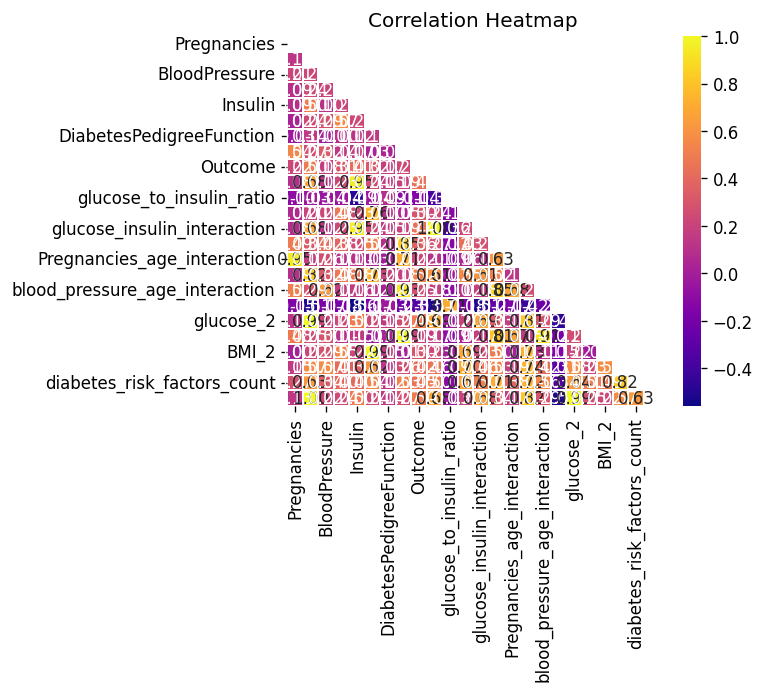

In [18]:
plot_correlation_matrix(df_imputed)

In [19]:
df_imputed.corr()['Outcome'].sort_values(ascending=False)

Outcome                           1.000000
bmi_glucose_interaction           0.523261
Glucose                           0.495954
glycemic_load                     0.495954
glucose_2                         0.494052
diabetes_risk_factors_count       0.454741
glucose_insulin_interaction       0.442938
insulin_resistance_index          0.442938
metabolic_syndrome_score          0.416817
Insulin                           0.410918
bmi_age_interaction               0.364581
BMI                               0.315271
SkinThickness                     0.308094
BMI_2                             0.300010
obesity_indicator                 0.296609
blood_pressure_age_interaction    0.252822
Age                               0.238356
Pregnancies_age_interaction       0.223992
Pregnancies                       0.221898
age_2                             0.193079
BloodPressure                     0.175087
DiabetesPedigreeFunction          0.173844
glucose_to_insulin_ratio         -0.142558
insulin_sen

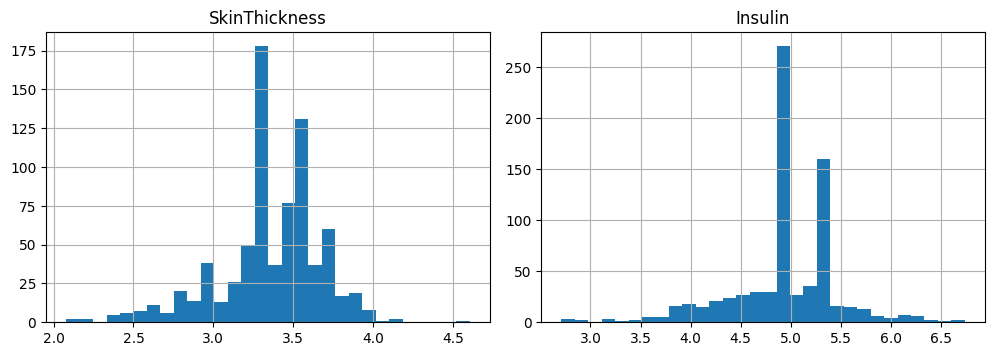

In [20]:
import numpy as np
columns_for_transformation = [ 'SkinThickness', 'Insulin']
df_imputed[columns_for_transformation] = df_imputed[columns_for_transformation].apply(lambda x: np.log1p(x))
plot_histograms(df_imputed[columns_for_transformation])

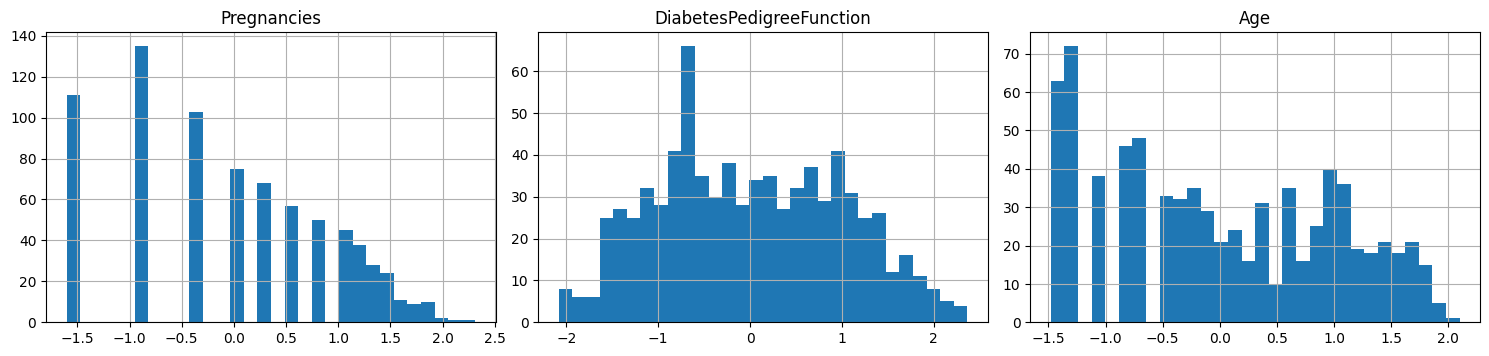

In [21]:
columns_for_transformation = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_imputed[columns_for_transformation] = pt.fit_transform(df_imputed[columns_for_transformation])
plot_histograms(df_imputed[columns_for_transformation])

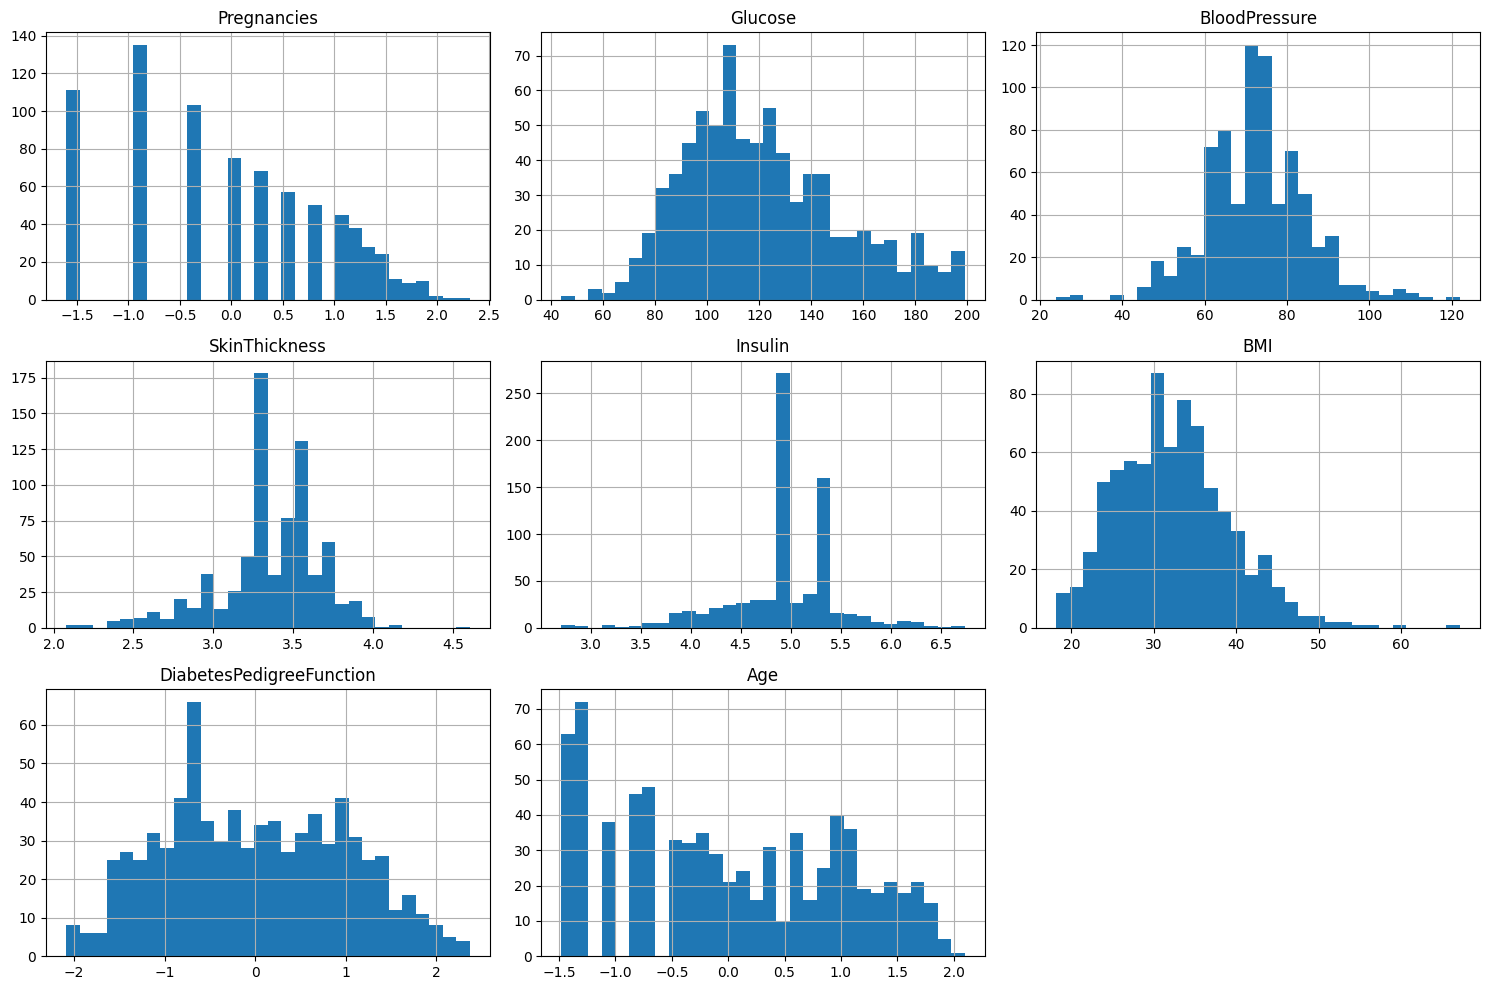

In [22]:
plot_histograms(df_imputed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [23]:
df_imputed[df_imputed == 0].count()
#df_imputed[df_imputed == -np.inf].count()

Pregnancies                         0
Glucose                             0
BloodPressure                       0
SkinThickness                       0
Insulin                             0
BMI                                 0
DiabetesPedigreeFunction            0
Age                                 0
Outcome                           500
insulin_resistance_index            0
glucose_to_insulin_ratio            0
obesity_indicator                 285
glucose_insulin_interaction         0
bmi_age_interaction                 0
Pregnancies_age_interaction       111
bmi_glucose_interaction             0
blood_pressure_age_interaction      0
insulin_sensitivity_index           0
glucose_2                           0
age_2                               0
BMI_2                               0
metabolic_syndrome_score          204
diabetes_risk_factors_count       205
glycemic_load                       0
dtype: int64

In [24]:
df_imputed.shape

(768, 24)

In [25]:
df_imputed.to_csv(config.PROCESSED_DATA_PATH, index=False)